# Actions to Correct vSPD result data

This notebook presents data and potential different wholesale market results associated with proposed variant actions-to-correct for the December 2019 UTS.  

It presents estimates of potential changes in,

  - wholesale market spot energy and reserve prices,
  - FTR prices (and potential changes in participant dollar amounts),
  - generation constrained ON/OFF costs,

See, 

https://www.ea.govt.nz/code-and-compliance/uts/undesirable-trading-situations-decisions/10-november-2019/ 

and particularly the consultation paper:

https://www.ea.govt.nz/assets/dms-assets/28/Consultation-paper-Proposed-Actions-to-Correct-2019-Undesirable-Trading-Situation.pdf

### data directory

The data directory contains the data files used in this notebook.  

These include:
  - vSPD output files for each ATC vSPD run.  These contain the results from each vSPD run (The intermediate part of each filename, for example "_NodeResults_TP" is taken directly from the vSPD output.  
     - For example, the nodal price output files for each vSPD run are:
        - G_revOffer_1_NodeResults_TP.parquet
        - H13_revOffers_NodeResults_TP.parquet
        - H19-revOffers_NodeResults_TP.parquet
        - H29-revOffers_NodeResults_TP.parquet
        - H742_revOffers_NodeResults_TP.parquet
        - UTS_20191203_20191227_NodeResults_TP.parquet
  - FTR.csv - which contains FTR data available from the FTR manager at https://www.ftr.co.nz
  - Energy_constrained_on_off_For_UTS.csv - which includes estimated generation constrained on and off amounts for each ATC
  - mapping.csv - an mapping between participant IDs and parent companies.
  - p_2019.parquet - final price data for 2019.

Note, the prefixes correspond to different possible actions to correct (scenarios), these are: 

  - G_revOffer_1: vSPD results from a single flat offer price of \\$13.70/MWh (single flat price NOT an offer price cap)
  - H13_revOffers: vSPD results from an offer price CAP of \\$13.70/MWh
  - H19-revOffers: vSPD results from an offer price CAP of \\$19.98/MWh
  - H29-revOffers: vSPD results from an offer price CAP of \\$29.59/MWh
  - H742_revOffers: vSPD results from an offer price CAP of \\$7.42/MWh
  - UTS_20191203_20191227: vSPD results from the application of vSPD to the original offers from the UTS period (3 December 2019 to 27 December 2019.)

The Authority's proposed actions to correct the UTS are represented by H13_revOffers.

### Other notes: 

  - The results in the ATC consultation paper include reconciled quantities used to calculate changes in wholesale spot market positions for each ATC.  We currently have chosen to not published reconciled amounts here.
  - additional vSPD result data is included in the data directory, these include Island, Summary and System results, other vSPD result files have been omitted due to Github file size limitations.
  



In [1]:
import pandas as pd
%pylab inline
from datetime import datetime, date, time, timedelta
import os
from ATC_functions import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
PATH = "data/"

files={'isl_res': 'IslandResults_TP.csv',
       'res_res': 'ReserveResults_TP.csv',
       'nod_res': 'NodeResults_TP.csv',
       'sum_res': 'SummaryResults_TP.csv',
       'sys_res': 'SystemResults.csv'}

cases = ["G_revOffer_1", 'H742_revOffers', "H13_revOffers", "H19-revOffers", "H29-revOffers", "UTS_20191203_20191227"]

In [3]:
# load vSPD results data
case_dict={}
# convert/load to parquet files - FAST.
for case in cases:  
    case_dict[case] = vSPD_loader(PATH, case, files=files, csv=False)

Loading: data/G_revOffer_1_NodeResults_TP.parquet
Loading: data/G_revOffer_1_IslandResults_TP.parquet
Loading: data/G_revOffer_1_SummaryResults_TP.parquet
Loading: data/G_revOffer_1_ReserveResults_TP.parquet
Loading: data/G_revOffer_1_SystemResults.parquet
Loading: data/H742_revOffers_NodeResults_TP.parquet
Loading: data/H742_revOffers_IslandResults_TP.parquet
Loading: data/H742_revOffers_SummaryResults_TP.parquet
Loading: data/H742_revOffers_ReserveResults_TP.parquet
Loading: data/H742_revOffers_SystemResults.parquet
Loading: data/H13_revOffers_NodeResults_TP.parquet
Loading: data/H13_revOffers_IslandResults_TP.parquet
Loading: data/H13_revOffers_SummaryResults_TP.parquet
Loading: data/H13_revOffers_ReserveResults_TP.parquet
Loading: data/H13_revOffers_SystemResults.parquet
Loading: data/H19-revOffers_NodeResults_TP.parquet
Loading: data/H19-revOffers_IslandResults_TP.parquet
Loading: data/H19-revOffers_SummaryResults_TP.parquet
Loading: data/H19-revOffers_ReserveResults_TP.parquet
Lo

In [4]:
# return vSPD spot energy and reserve price results
df_energy = {} 
df_reserve = {} 
for c in cases:
    print(c)
    df_energy[c] = get_prices(case_dict, c)
    df_reserve[c] = get_reserve_prices(case_dict, c) 

G_revOffer_1
H742_revOffers
H13_revOffers
H19-revOffers
H29-revOffers
UTS_20191203_20191227


G_revOffer_1
H742_revOffers
H13_revOffers
H19-revOffers
H29-revOffers
UTS_20191203_20191227


Text(0.5, 1.0, 'ATC vSPD results (mean NZ wholesale energy prices)')

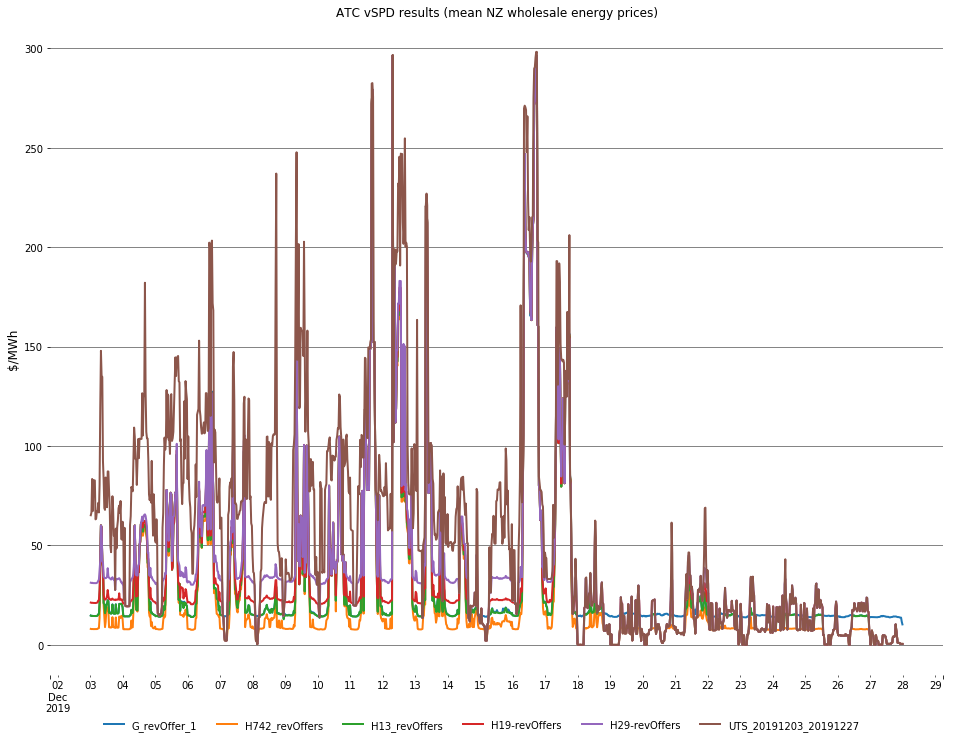

In [5]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
for c in cases:
    print(c)
    df_energy[c].groupby(level=0).mean().plot(ax=ax, label=c, lw=2)
legend_format(ax, cols=6, xpos=0.05, ypos=-0.1)
plot_formatting(ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=12)
ax.set_title('ATC vSPD results (mean NZ wholesale energy prices)')

# FTR results

In [6]:
mapping = pd.read_csv(PATH + "mapping.csv", index_col=0, header=None)[1].to_dict()

In [7]:
FTR_nodes = ['BEN2201', 'HAY2201', 'OTA2201', 'ISL2201', 'INV2201', 'WKM2201', 'KIK2201', 'RDF2201']
F = get_FTR_data(PATH + "FTR.csv")

In [8]:
F_dec2019 = get_dec_2019_ftr_data(F)

In [9]:
F_dec2019.head()

CurrentOwner        CTCT  GENE  GENF  HETL  MEFL  MERI  MMAE  MRPL  OMFM  \
HedgeType FTR                                                              
OBL       BEN->HAY   NaN   NaN   NaN   5.9   NaN   5.0   NaN   NaN   0.0   
          BEN->INV   NaN   NaN   NaN   NaN   NaN   0.1   2.0   NaN   NaN   
          BEN->ISL   NaN   NaN   1.9   NaN   NaN   NaN   NaN   NaN   NaN   
          HAY->BEN   NaN   NaN   NaN  14.6   NaN   NaN   NaN   NaN   NaN   
          HAY->RDF   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   

CurrentOwner        SWCH  SWET  TRUS  
HedgeType FTR                         
OBL       BEN->HAY   NaN   NaN   NaN  
          BEN->INV   NaN   NaN   NaN  
          BEN->ISL   NaN   NaN   NaN  
          HAY->BEN   NaN   NaN   NaN  
          HAY->RDF   NaN   NaN   NaN

In [10]:
p_bc = get_dec_2019_price(PATH + 'p_2019.parquet', FTR_nodes)  # return Basecase FTR node prices
p_bc.head()

PNode,BEN2201,HAY2201,OTA2201,ISL2201,INV2201,WKM2201,KIK2201,RDF2201
datetime,,,,,,,,
2019-12-01 00:15:00,62.9580,66.6900,74.5452,65.8236,60.1506,68.8416,66.5371,68.6325
2019-12-01 00:45:00,57.1753,59.3431,66.1206,59.8331,56.2995,61.0376,60.4817,60.8533
2019-12-01 01:15:00,61.6326,63.9647,70.5774,64.5408,60.8397,65.2135,65.2404,65.0179
2019-12-01 01:45:00,61.7698,64.1070,69.5825,64.6832,60.8745,65.7339,65.3911,65.5193
2019-12-01 02:15:00,55.1041,56.9142,61.3093,57.7036,55.1585,58.1337,58.3379,57.9335


In [11]:
df_FTR = {} #pd.DataFrame()
df_FTR_obl = {}
df_FTR_opt = {}

for c in cases:
    print(c)
    df_FTR_opt[c], df_FTR_obl[c], df_FTR[c] = calc_FTR_dollars(F_dec2019, p_bc, case_dict, c, FTR_nodes)
    
df_FTR_obl = pd.DataFrame(df_FTR_obl)
df_FTR_opt = pd.DataFrame(df_FTR_opt)
df_FTR = pd.DataFrame(df_FTR)

G_revOffer_1
H742_revOffers
H13_revOffers
H19-revOffers
H29-revOffers
UTS_20191203_20191227


In [12]:
df_FTR_diff=df_FTR.sub(df_FTR.loc[:, "UTS_20191203_20191227"], axis=0).round(-1)

In [13]:
df_FTR_diff=df_FTR.sub(df_FTR.loc[:, "UTS_20191203_20191227"], axis=0).round(-1)
df_FTR_diff = df_FTR_diff.swaplevel(0,1).unstack().fillna(0)
df_FTR_diff.index = df_FTR_diff.index.map(lambda x: mapping[x])
df_FTR_diff.index = df_FTR_diff.index.map(lambda x: attempt_to_sort_out_parent_company_mappings(x))
df_FTR_diff_all = df_FTR_diff.groupby(level=0, axis=1).sum()
df_FTR_diff_all = df_FTR_diff_all.groupby(level=0).sum()

In [14]:
df_FTR_diff_all

,G_revOffer_1,H13_revOffers,H19-revOffers,H29-revOffers,H742_revOffers,UTS_20191203_20191227
CurrentOwner,,,,,,
Contact,223900.0,212600.0,162610.0,118730.0,284170.0,0.0
Genesis,8050.0,4370.0,1950.0,10.0,8380.0,0.0
Haast Trading,-651760.0,-712780.0,-653460.0,-562940.0,-771270.0,0.0
MMA,15090.0,15170.0,13800.0,11550.0,16760.0,0.0
Macquarie Equipment Finance,225700.0,221320.0,189460.0,154360.0,262730.0,0.0
Mercury,-116840.0,-152440.0,-145750.0,-129600.0,-153660.0,0.0
Meridian,39460.0,-4170.0,-27680.0,-37860.0,36260.0,0.0
OM Financial,-11510.0,-19820.0,-21100.0,-20390.0,-16050.0,0.0
Smartwin Trading,16840.0,16650.0,14250.0,11630.0,19770.0,0.0


# Constrained ON payments...

Generator offers will at times be greater than the recalculated lower ATC prices resulting in constrained on payments.  


In [15]:
con_on = pd.read_csv(PATH + 'Energy_constrained_on_off_For_UTS.csv', index_col=[0,1,3,4,5,8])
con_on = con_on.unstack().unstack()['dollars'].xs('ON', level=1, axis=1)
con_on = con_on.query("""(name!='CLU') & (name!='WTR')""")

In [16]:
con_on.groupby(level=[2]).sum()

scenario_name,H13_revOffers,H19-revOffers,H29-revOffers,H742_revOffers,UTS_20191203_20191227
trader,,,,,
CTCT,125607.21,124958.30,123729.57,126196.56,91813.42
GENE,422787.65,379715.17,320159.35,474588.35,173956.64
KING,10673.93,9958.31,8999.16,11415.39,1871.70
MERI,72290.07,42001.72,12313.97,102249.42,67.40
MRPL,367613.22,319470.57,254947.22,414906.07,13439.07
TODD,55816.74,55503.46,54970.84,56066.24,53020.89
TRUS,237329.09,209836.65,188302.16,305842.56,67728.18


In [17]:
CON_on = con_on.groupby(level=2).sum()
CON_on_diff = CON_on.subtract(CON_on['UTS_20191203_20191227'], axis=0)
CON_on_diff.index = CON_on_diff.index.map(lambda x: mapping[x])
CON_on_diff.index = CON_on_diff.index.map(lambda x: attempt_to_sort_out_parent_company_mappings(x))
CON_on_diff = CON_on_diff.groupby(level=0).sum()

In [18]:
CON_on_diff

scenario_name,H13_revOffers,H19-revOffers,H29-revOffers,H742_revOffers,UTS_20191203_20191227
trader,,,,,
Contact,33793.79,33144.88,31916.15,34383.14,0.0
Genesis,248831.01,205758.53,146202.71,300631.71,0.0
King Country,8802.23,8086.61,7127.46,9543.69,0.0
Mercury,354174.15,306031.50,241508.15,401467.00,0.0
Meridian,72222.67,41934.32,12246.57,102182.02,0.0
Nova,2795.85,2482.57,1949.95,3045.35,0.0
TrustPower,169600.91,142108.47,120573.98,238114.38,0.0
